### Time Series Analysis

### Assignment _ Practical4

### AR(1) Process: Its Simulation , ACF and PACF plots

#### 2448050

In [1]:
# IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller



=== Simulating AR(1) with phi = 0.2 ===


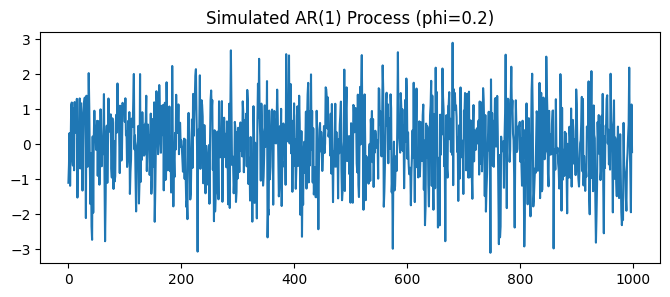

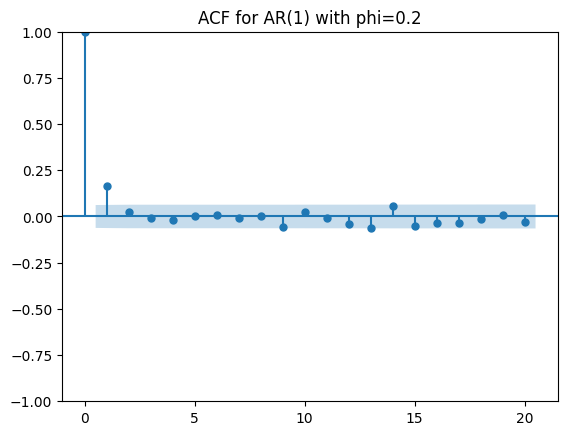

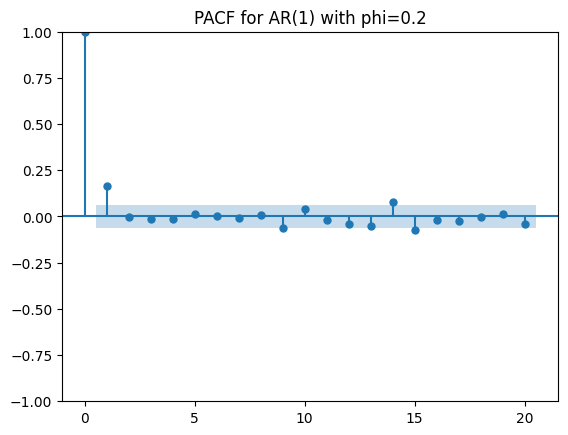


=== Simulating AR(1) with phi = 0.5 ===


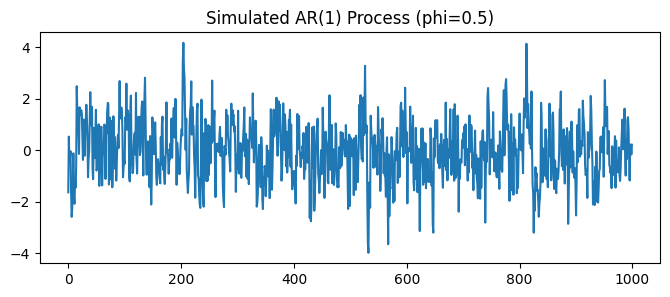

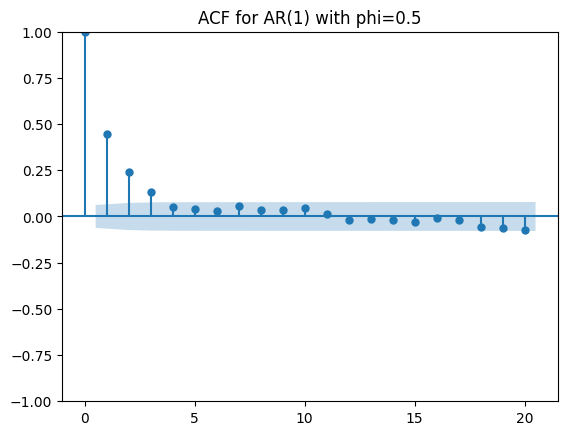

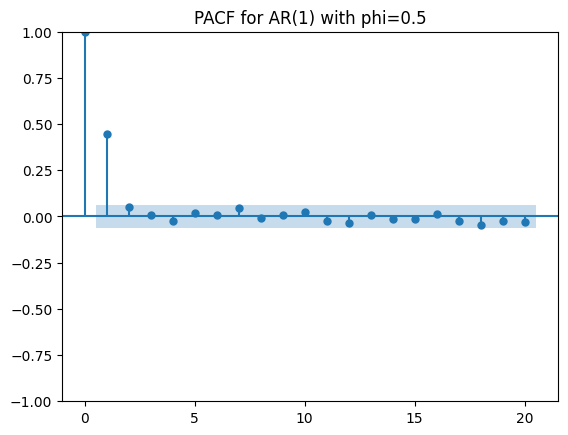


=== Simulating AR(1) with phi = 0.9 ===


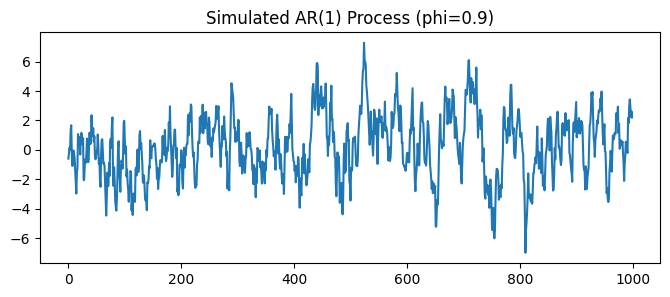

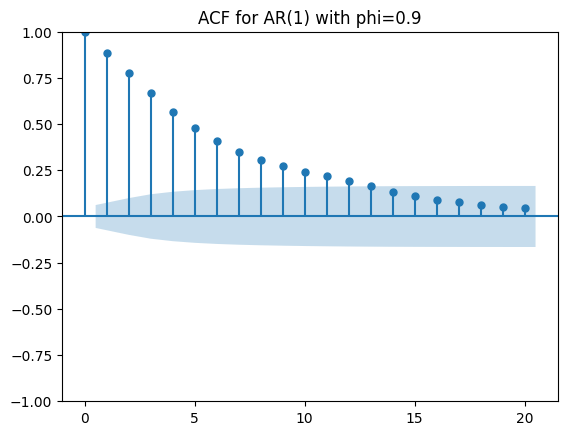

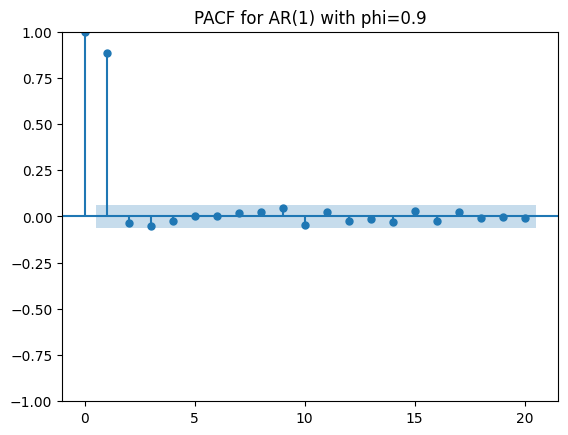


=== Simulating AR(1) with phi = -0.5 ===


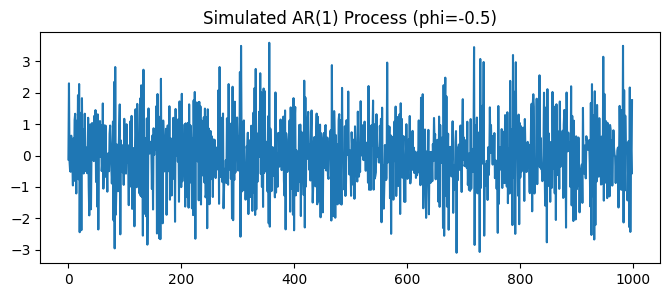

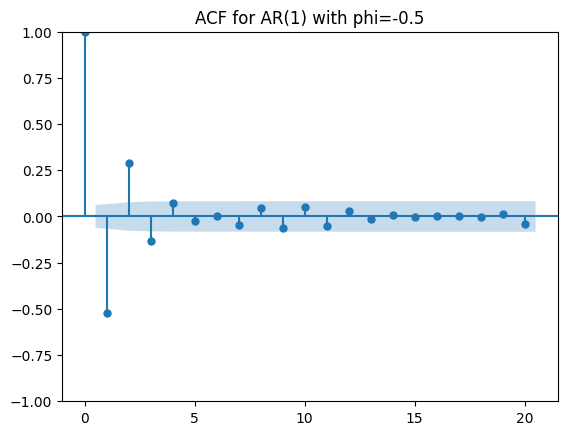

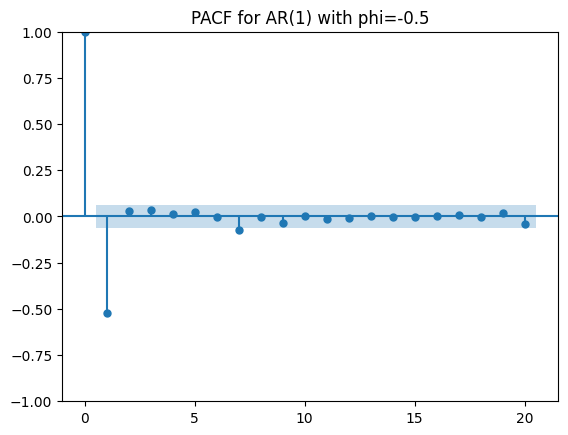

In [2]:
# PART 1: SIMULATION OF AR(1) PROCESS WITH DIFFERENT COEFFICIENTS
phi_values = [0.2, 0.5, 0.9, -0.5]
n = 1000  # number of observations

for phi in phi_values:
    print(f"\n=== Simulating AR(1) with phi = {phi} ===")
    ar = np.array([1, -phi])   # AR(1) coefficients
    ma = np.array([1])         # MA(0)
    arma_process = ArmaProcess(ar, ma)
    y_sim = arma_process.generate_sample(nsample=n)

    # Time series plot
    plt.figure(figsize=(8,3))
    plt.plot(y_sim)
    plt.title(f"Simulated AR(1) Process (phi={phi})")
    plt.show()

    # ACF plot
    plot_acf(y_sim, lags=20)
    plt.title(f"ACF for AR(1) with phi={phi}")
    plt.show()

    # PACF plot
    plot_pacf(y_sim, lags=20, method='ywm')
    plt.title(f"PACF for AR(1) with phi={phi}")
    plt.show()


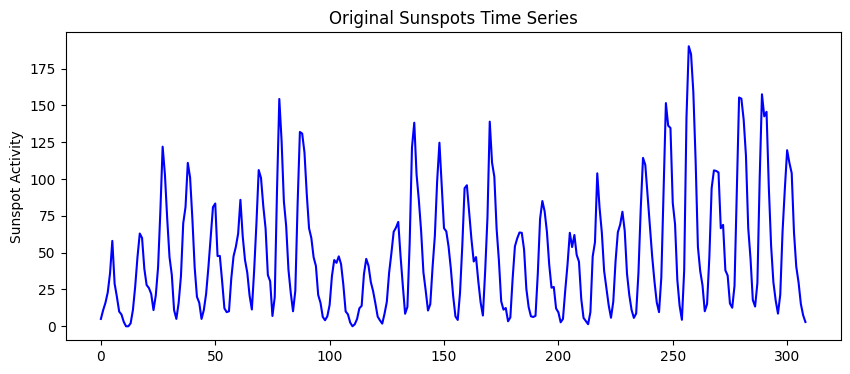

In [3]:
# PART 2: LOAD AND VISUALIZE SUNSPOTS DATASET
data = sm.datasets.sunspots.load_pandas().data
y = data['SUNACTIVITY']

# Plot original series
plt.figure(figsize=(10,4))
plt.plot(y, color='blue')
plt.title("Original Sunspots Time Series")
plt.ylabel("Sunspot Activity")
plt.show()



 AR(1) on Original Sunspots Series:

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1406.585
Date:                Fri, 01 Aug 2025   AIC                           2819.169
Time:                        12:22:52   BIC                           2830.369
Sample:                             0   HQIC                          2823.647
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3963      9.949      4.865      0.000      28.897      67.895
ar.L1          0.8244      0.036     23.011      0.000       0.754       0.895
sigma2       5

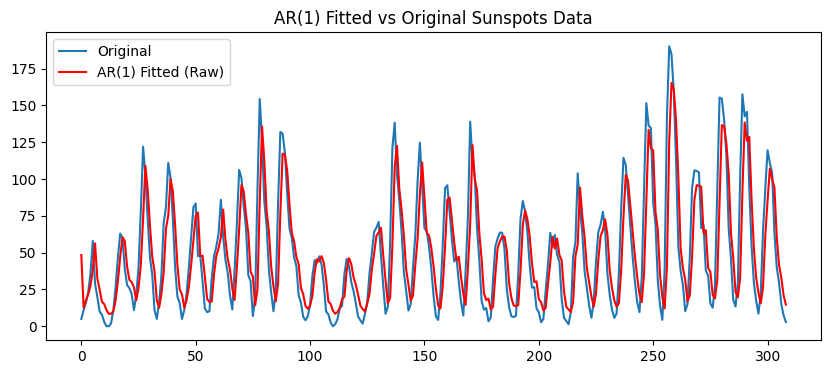

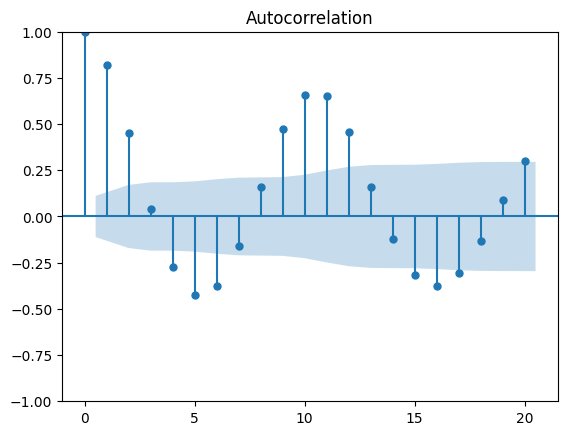

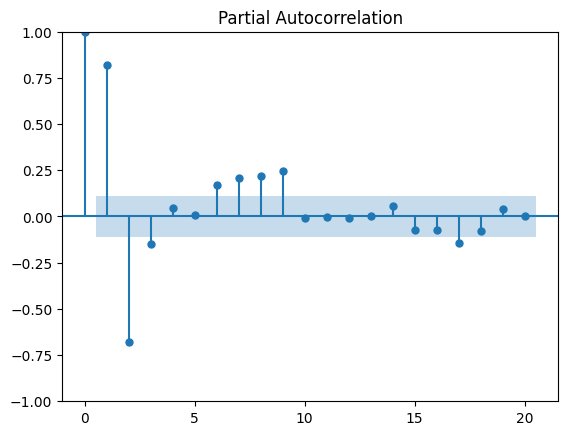

In [4]:
# FIT AR(1) MODEL ON RAW SUNSPOTS DATA
model_raw = ARIMA(y, order=(1,0,0))
result_raw = model_raw.fit()
print("\n AR(1) on Original Sunspots Series:\n")
print(result_raw.summary())

# Plot fitted vs original
plt.figure(figsize=(10,4))
plt.plot(y, label='Original')
plt.plot(result_raw.fittedvalues, color='red', label='AR(1) Fitted (Raw)')
plt.legend()
plt.title("AR(1) Fitted vs Original Sunspots Data")
plt.show()

# ACF and PACF
plot_acf(y, lags=20)
plt.show()

plot_pacf(y, lags=20, method='ywm')
plt.show()


In [5]:
# STATIONARITY TEST USING ADF
adf_result = adfuller(y)
print(f"\nADF Statistic (Raw): {adf_result[0]:.3f}, p-value: {adf_result[1]:.3f}")
if adf_result[1] > 0.05:
    print("The series is NON-STATIONARY. Proceeding with transformation...")



ADF Statistic (Raw): -2.838, p-value: 0.053
The series is NON-STATIONARY. Proceeding with transformation...



ADF Statistic (Log-Differenced): -13.761, p-value: 0.000
The series is STATIONARY after log-differencing.


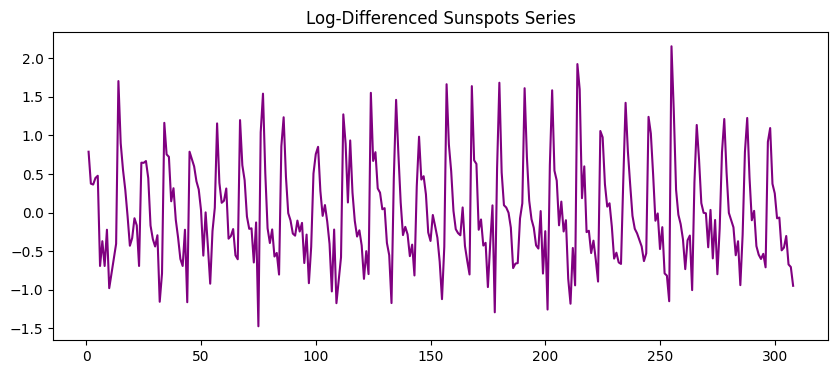

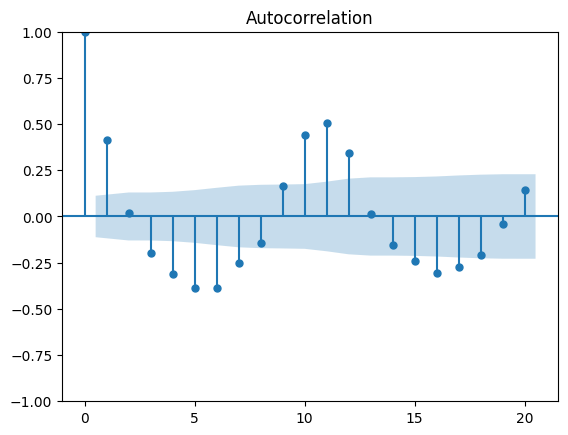

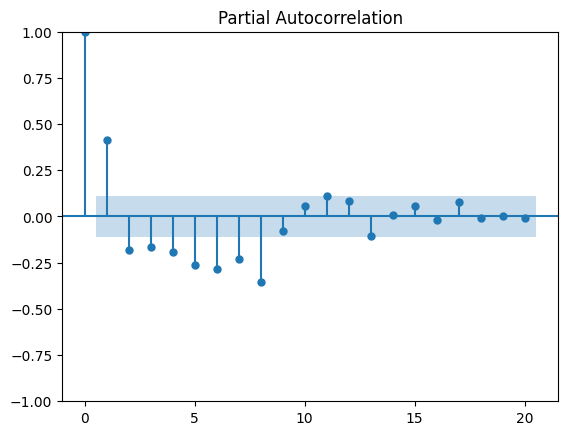

In [6]:
# LOG TRANSFORMATION & DIFFERENCING
y_log = np.log(y.replace(0, np.nan)).dropna()
y_diff = y_log.diff().dropna()

# ADF Test after transformation
adf_result2 = adfuller(y_diff)
print(f"\nADF Statistic (Log-Differenced): {adf_result2[0]:.3f}, p-value: {adf_result2[1]:.3f}")
if adf_result2[1] < 0.05:
    print("The series is STATIONARY after log-differencing.")
else:
    print("Still not stationary, consider seasonal differencing.")

# Plot transformed series
plt.figure(figsize=(10,4))
plt.plot(y_diff, color='purple')
plt.title("Log-Differenced Sunspots Series")
plt.show()

# ACF and PACF for differenced series
plot_acf(y_diff, lags=20)
plt.show()

plot_pacf(y_diff, lags=20, method='ywm')
plt.show()



AR(1) on Log-Differenced Sunspots Series:

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  305
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -281.081
Date:                Fri, 01 Aug 2025   AIC                            568.162
Time:                        12:22:53   BIC                            579.323
Sample:                             0   HQIC                           572.626
                                - 305                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.076     -0.028      0.977      -0.151       0.147
ar.L1          0.4148      0.060      6.931      0.000       0.298       0.532
sigma2  

c:\Users\shrad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\shrad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\shrad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


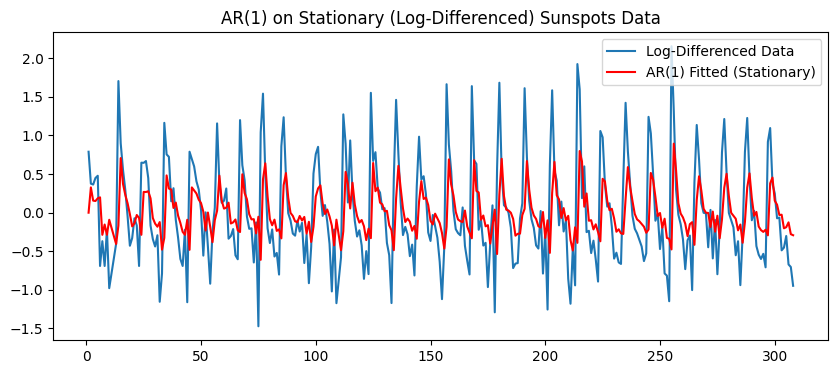


 Result: Simulation + Real Dataset Modeling Done


In [7]:
# FIT AR(1) MODEL ON STATIONARY DATA
model_diff = ARIMA(y_diff, order=(1,0,0))
result_diff = model_diff.fit()
print("\nAR(1) on Log-Differenced Sunspots Series:\n")
print(result_diff.summary())

# Plot fitted vs differenced data
plt.figure(figsize=(10,4))
plt.plot(y_diff, label='Log-Differenced Data')
plt.plot(result_diff.fittedvalues, color='red', label='AR(1) Fitted (Stationary)')
plt.legend()
plt.title("AR(1) on Stationary (Log-Differenced) Sunspots Data")
plt.show()

print("\n Result: Simulation + Real Dataset Modeling Done")

